In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

# Exercise 1
## a)
The Integration of the equation
$$
\frac{dT}{dt} = -\frac{2}{3k_B} n_H\Lambda(T)
$$
is performed by a second order Runge-Kutta scheme with the script \texttt{ex2\_1\_a.cc}. The resulting values for the time and the temperature are exported in a text file, which is now read in order to plot the result.

In [2]:
def get_x_y(path):
    file = open(path)
    n_pts = int(file.readline())
    x = np.zeros(n_pts)
    y = np.zeros(n_pts)
    print("reading", n_pts, "entries from file:", path)
    for i in range(n_pts):
        x[i] = float(file.readline())
        y[i] = float(file.readline())
    file.close()
    return x, y    

reading 54226 entries from file: data_ex1_a.dat


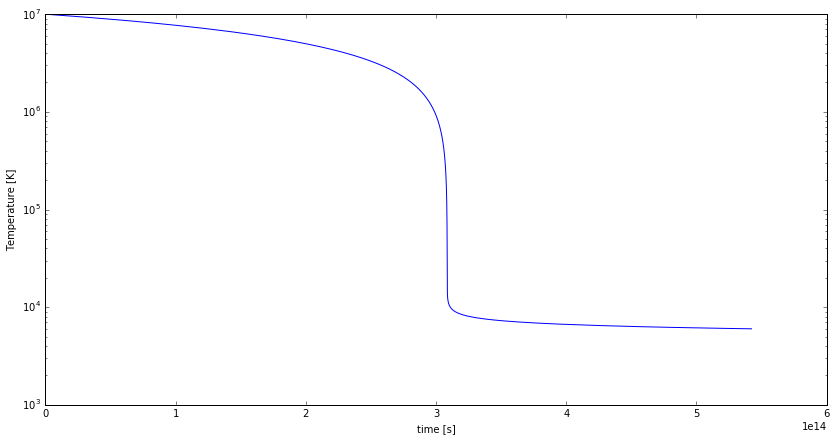

In [3]:
time, temp = get_x_y("data_ex1_a.dat")
plt.figure(1, figsize=(14,7))
plt.semilogy(time, temp)
plt.ylabel("Temperature [K]")
plt.xlabel("time [s]")
plt.show()

## b)

The solution in a) was performed using $\Delta t = 10^{10} ~s$ for the time steps. This results in roughly 54000 data points. We now want to see if the size of the time step has an influence on the solutions stability.
It can be seen from the plots, that almost a factor of 10 in the reduction of the time step width is possible without the simulation behaving weired. For $\Delta t = 9.9\times10^{11}s$ one can see that the result features obvious deviations from the solution of a). For $\Delta t = 1\times10^{12} the temperature even becomes neagative.

reading 5591 entries from file: data_ex1_b_9.7.dat
reading 5383 entries from file: data_ex1_b_9.9.dat
reading 3088 entries from file: data_ex1_b_10.dat


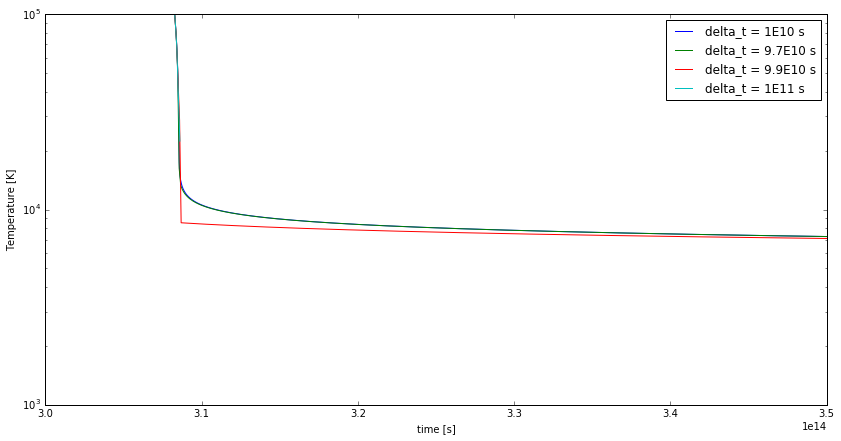

In [6]:
plt.figure(2, figsize=(14,7))
plt.semilogy(time, temp)

time1, temp1 = get_x_y("data_ex1_b_9.7.dat")
plt.semilogy(time1, temp1)

time2, temp2 = get_x_y("data_ex1_b_9.9.dat")
plt.semilogy(time2, temp2)

time3, temp3 = get_x_y("data_ex1_b_10.dat")
plt.semilogy(time3, temp3)


plt.legend(('delta_t = 1E10 s', "delta_t = 9.7E10 s", "delta_t = 9.9E10 s", "delta_t = 1E11 s"))
plt.ylim((1E3, 1E5))
plt.xlim((3E14,3.5E14))
plt.ylabel("Temperature [K]")
plt.xlabel("time [s]")
plt.show()

## c)
Now we need to implement an adaptive step size, that will automatically adjust the size of $\Delta t$ such that locally an error of $\Delta T_{err}^{max} = 50~K$ won't be exeeded. This is achieved by the following algorithm:
\begin{enumerate}
\item explain here the algorithm
\item
\item
\end{enumerate}

Running the algorithm is much faster now. For an initial step size of $\Delta_t^0 = 10^{10}~s$ the algorithm yields 75 data points. The result however is very close to the one obtained in part a)!

Looking at the second plot one can see, how the size of the time step is automatically first increased to save computation time and in the area, where the function changes rapidly, the step size is reduced by many orders of magnitude. After it reaches the flat bottom, the step size increases again. In this plot one can also see, how different initial values for $\Delta t$ all lead to the same following values for the time steps. This shows that this method is robust in this case.

reading 75 entries from file: data_ex1_c.dat


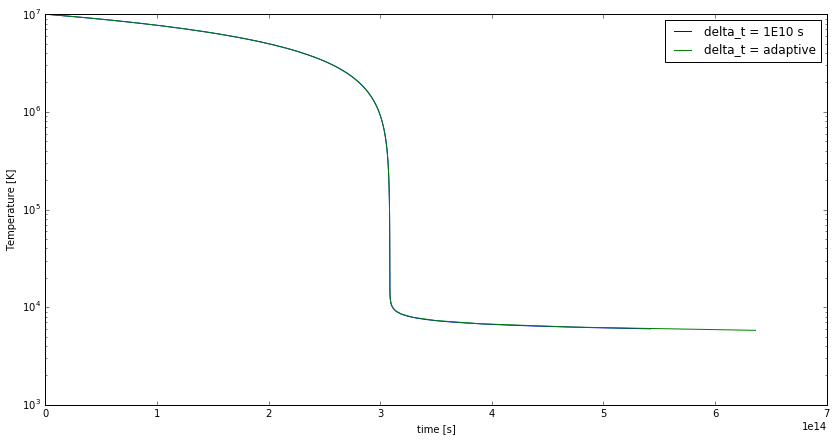

reading 62 entries from file: steps_ex1_c_1E9.dat
reading 75 entries from file: steps_ex1_c_1E10.dat
reading 68 entries from file: steps_ex1_c_1E13.dat


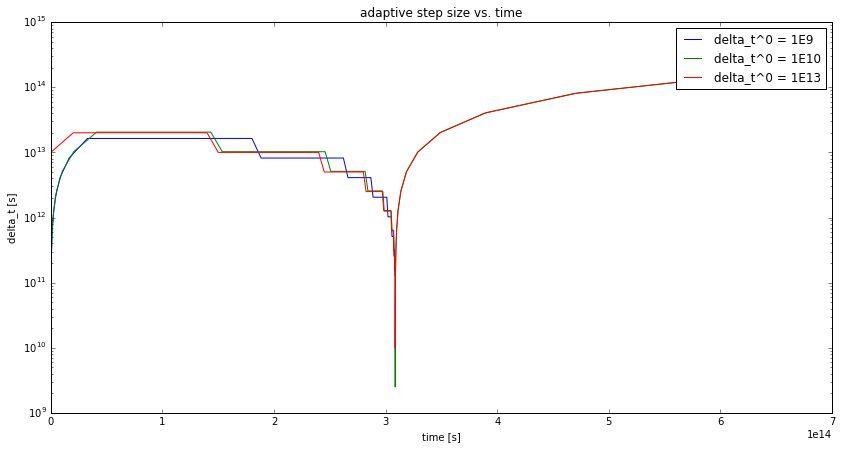

In [5]:
plt.figure(3, figsize=(14,7))
plt.semilogy(time, temp)

time_ada, temp_ada = get_x_y("data_ex1_c.dat")
plt.semilogy(time_ada, temp_ada)

plt.legend(("delta_t = 1E10 s", "delta_t = adaptive"))
plt.ylabel("Temperature [K]")
plt.xlabel("time [s]")
plt.show()



plt.figure(4, figsize=(14,7))    

time_ada1, steps1 = get_x_y("steps_ex1_c_1E9.dat")
plt.semilogy(time_ada1, steps1)

time_ada2, steps2 = get_x_y("steps_ex1_c_1E10.dat")
plt.semilogy(time_ada2, steps2)

time_ada3, steps3 = get_x_y("steps_ex1_c_1E13.dat")
plt.semilogy(time_ada3, steps3)

plt.title("adaptive step size vs. time")
plt.ylabel("delta_t [s]")
plt.xlabel("time [s]")
plt.legend(("delta_t^0 = 1E9","delta_t^0 = 1E10", "delta_t^0 = 1E13"))
plt.show()